# Kalman filtering benchmark 

### Import packages

In [1]:
import logging
from tifffile import imread
import matplotlib.pyplot as plt

from logger import logger
from utils import get_stack_baseline
from stackviewers import view, dualview, plot_summary
from kalman import KalmanDenoiser

logger.setLevel(logging.INFO)

### Load raw image stack

 12/10/2021 13:59:55: stack size: (90, 256, 170)
 12/10/2021 13:59:55: rendering stack view...


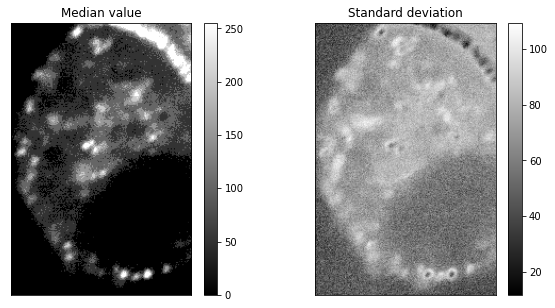

In [2]:
fpath = '../../data/raw.tif'
stack = imread(fpath)
stack = stack / stack.max() * 255
stack = stack[10:]
fig = plot_summary(stack)
view(stack, title='Raw')

### Generate and visualize padding baseline

 12/10/2021 13:59:56: constructing 10-frames baseline from 90-frames stack...
 12/10/2021 13:59:56: stack size: (10, 256, 170)
 12/10/2021 13:59:56: rendering stack view...


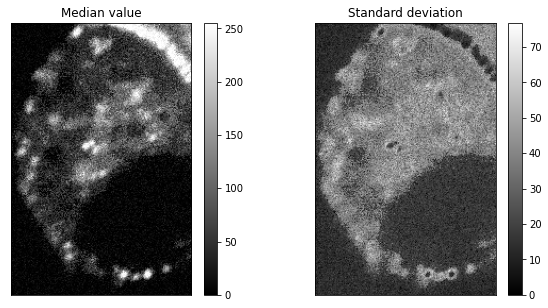

In [3]:
npad = 10
baseline = get_stack_baseline(stack, npad)
fig = plot_summary(baseline)
view(baseline)

### Apply Kalman filtering and compare outputs

 12/10/2021 13:59:56: constructing 10-frames baseline from 90-frames stack...
 12/10/2021 13:59:56: filtering 90-frames stack with KalmanDenoiser(gain=0.8, var=0.5, npad=10)


100%|██████████| 99/99 [00:00<00:00, 2742.39it/s]


 12/10/2021 13:59:56: stack size: (90, 256, 170)
 12/10/2021 13:59:56: rendering stacks view...


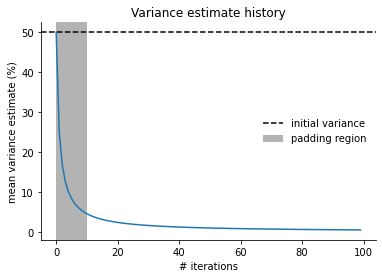

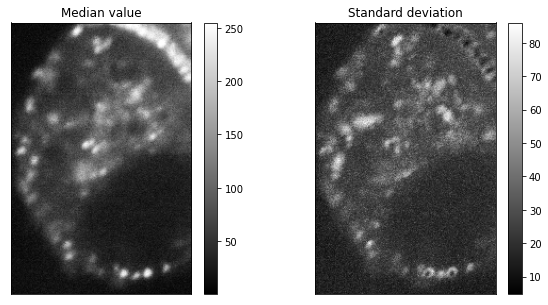

In [4]:
gain = 0.8
variance = 0.5
npad = 10
kd = KalmanDenoiser(G=gain, V=variance, npad=npad)
filtered_stack, ex_history = kd.filter(stack, full_output=True)
fig1 = kd.plot_variance_history(ex_history);
fig2 = plot_summary(filtered_stack);
dualview(stack, filtered_stack, title1='Raw', title2='Filtered', suptitle=kd)